# Earth quake
> graph laplacian

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Graph Laplacian, PCA]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/earthquakes-23k.csv')
df

,Date,Latitude,Longitude,Magnitude
0,01/02/1965,19.2460,145.6160,6.0
1,01/04/1965,1.8630,127.3520,5.8
2,01/05/1965,-20.5790,-173.9720,6.2
3,01/08/1965,-59.0760,-23.5570,5.8
4,01/09/1965,11.9380,126.4270,5.8
...,...,...,...,...
23407,12/28/2016,38.3917,-118.8941,5.6
23408,12/28/2016,38.3777,-118.8957,5.5
23409,12/28/2016,36.9179,140.4262,5.9
23410,12/29/2016,-9.0283,118.6639,6.3


In [3]:
# df.assign 임시 데이터 만들어줘서 원래 데이터 안 건들이게
lst=[df.assign(Year=list(map(lambda x: x.split('/')[-1], df.Date))).\
groupby('Year').\
pipe(list)[i][1].iloc[:,[1,2,3]].\
to_numpy().tolist() for i in range(2017-1965)]

pipe는 튜플로 묶여 있어서 [][] 해줘야 데이터프레임으로 나오지

한 번에 list로 안 되어서 numpy 해준 후 list

`-` 숙제: 

지진자료에서 1985년 이후의 자료만 고른뒤에 HeatMapWithTime()을 이용하여 시각화하라.

In [4]:
lst2=[df.assign(Year=list(map(lambda x: x.split('/')[-1], df.Date))).query('Year>="1985"').\
groupby('Year').\
pipe(list)[i][1].iloc[:,[1,2,3]].\
to_numpy().tolist() for i in range(2016-1985)]

- t = Year
- x = Latitude
- y = Longitude
- f = Magnitude

In [5]:
_df = df.assign(Year=list(map(lambda x: x.split('/')[-1], df.Date))).query('Year>="2015"').reset_index().iloc[:,1:]
_df

,Date,Latitude,Longitude,Magnitude,Year
0,01/02/2015,6.5739,60.3653,5.5,2015
1,01/05/2015,-43.0546,171.2364,5.6,2015
2,01/06/2015,55.2049,163.2446,5.6,2015
3,01/07/2015,5.9045,-82.6576,6.5,2015
4,01/08/2015,-61.6118,161.3346,5.7,2015
...,...,...,...,...,...
910,12/28/2016,38.3917,-118.8941,5.6,2016
911,12/28/2016,38.3777,-118.8957,5.5,2016
912,12/28/2016,36.9179,140.4262,5.9,2016
913,12/29/2016,-9.0283,118.6639,6.3,2016


In [103]:
f = _df.loc[:,"Magnitude"]

In [ ]:
f_true = _df.loc[:,"Magnitude"]

In [ ]:
f = f_true + np.random.normal(scale=0.2,size=len(f_true))

In [51]:
f.shape

(915,)

In [ ]:
plt.plot(f_true,'.')
plt.plot(f,'-')

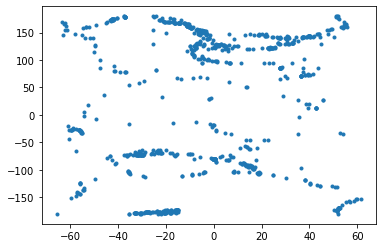

In [105]:
plt.plot( _df.Latitude,_df.Longitude,'.')

$$dist((x_i,y_i),(x_j,y_j))$$

In [108]:
def dist(i,j):
    return np.sqrt( ( ( _df.Latitude[j] - _df.Latitude[i] )**2) + ( ( _df.Longitude[j] - _df.Longitude[i])**2) )

$$W_{i,j}=\begin{cases}{exp(-\frac{[dist(i,j)]^2}{2\theta^2})} & \quad \text{if } dist(i,j) \leq κ \\ 0 & \quad \text{otherwise} \end{cases}$$

In [109]:
def weight(i,j,theta=10,kappa=100):
    return np.exp( -np.abs(dist(i,j))**2 / (2*theta**2) ) if dist(i,j) <= kappa else 0

In [110]:
W = np.array([[weight(i,j) for i in range(len(_df))] for j in range(len(_df))])

In [111]:
W

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.20783713e-16, 1.23355927e-08, 4.72126380e-17],
       [0.00000000e+00, 1.00000000e+00, 7.86860671e-22, ...,
        1.12413695e-16, 3.04951206e-09, 1.03131967e-16],
       [0.00000000e+00, 7.86860671e-22, 1.00000000e+00, ...,
        1.39055291e-02, 5.30939200e-14, 1.88878509e-02],
       ...,
       [1.20783713e-16, 1.12413695e-16, 1.39055291e-02, ...,
        1.00000000e+00, 2.44062848e-06, 9.94026527e-01],
       [1.23355927e-08, 3.04951206e-09, 5.30939200e-14, ...,
        2.44062848e-06, 1.00000000e+00, 1.57119318e-06],
       [4.72126380e-17, 1.03131967e-16, 1.88878509e-02, ...,
        9.94026527e-01, 1.57119318e-06, 1.00000000e+00]])

In [112]:
D = np.diag(W.sum(axis=1))

In [113]:
D

array([[ 3.65998438,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 31.59296441,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 14.54828876, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 56.79401824,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        41.43859957,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 55.80133105]])

In [114]:
L = D - W

In [115]:
L

array([[ 2.65998438e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.20783713e-16, -1.23355927e-08, -4.72126380e-17],
       [ 0.00000000e+00,  3.05929644e+01, -7.86860671e-22, ...,
        -1.12413695e-16, -3.04951206e-09, -1.03131967e-16],
       [ 0.00000000e+00, -7.86860671e-22,  1.35482888e+01, ...,
        -1.39055291e-02, -5.30939200e-14, -1.88878509e-02],
       ...,
       [-1.20783713e-16, -1.12413695e-16, -1.39055291e-02, ...,
         5.57940182e+01, -2.44062848e-06, -9.94026527e-01],
       [-1.23355927e-08, -3.04951206e-09, -5.30939200e-14, ...,
        -2.44062848e-06,  4.04385996e+01, -1.57119318e-06],
       [-4.72126380e-17, -1.03131967e-16, -1.88878509e-02, ...,
        -9.94026527e-01, -1.57119318e-06,  5.48013310e+01]])

고유값 분해

In [116]:
λ, Ψ = np.linalg.eig(L)

In [117]:
Λ = np.diag(λ)

Note that ${\bf L} = {\boldsymbol\Psi} {\boldsymbol\Lambda} {\boldsymbol\Psi}^\top$

In [118]:
Ψ @ Λ @ Ψ.T

array([[ 2.65998438e+00,  8.16182639e-15, -3.82938962e-15, ...,
        -1.40115829e-14, -1.23355860e-08, -1.39853675e-14],
       [ 8.16475458e-15,  3.05929644e+01, -9.88434595e-15, ...,
        -2.95865762e-14, -3.04930895e-09, -1.75873855e-14],
       [-3.82895758e-15, -9.88541660e-15,  1.35482888e+01, ...,
        -1.39055291e-02, -4.60764239e-14, -1.88878509e-02],
       ...,
       [-1.40133770e-14, -2.95729153e-14, -1.39055291e-02, ...,
         5.57940182e+01, -2.44062895e-06, -9.94026527e-01],
       [-1.23355860e-08, -3.04930896e-09, -4.60974574e-14, ...,
        -2.44062895e-06,  4.04385996e+01, -1.57119480e-06],
       [-1.39871497e-14, -1.76079854e-14, -1.88878509e-02, ...,
        -9.94026527e-01, -1.57119480e-06,  5.48013310e+01]])

---

In [176]:
np.sum(np.argsort(λ)[:-250])/np.sum(np.argsort(λ))

0.9099783573076969

---

$Z^\top = X^\top$

In [149]:
Ψ @ np.sqrt(Λ)

array([[-4.07880429e-12, -2.26626061e-12,  2.49329887e-11, ...,
        -6.59776522e-17, -8.35299033e-19,  4.20976156e-19],
       [-8.07310309e-07, -1.11282463e-06,  1.78019153e-06, ...,
         5.18209603e-17, -4.62563760e-16, -3.07446730e-15],
       [ 1.37312998e-09,  1.21827118e-09, -6.12751548e-09, ...,
        -2.35239674e-16, -1.60769652e-16,  8.11153365e-16],
       ...,
       [-5.80945916e-07, -5.14115443e-07,  2.66705057e-06, ...,
        -2.02769332e-16, -2.62739516e-16,  3.32624078e-15],
       [-3.52685340e-06, -2.47455595e-06,  1.83394309e-05, ...,
         1.43625429e-16, -1.17622069e-16,  5.42483134e-15],
       [-5.39885978e-07, -4.78229394e-07,  2.47495723e-06, ...,
        -4.75416329e-16, -6.44874219e-16,  2.39938950e-15]])

$Z = X$

In [150]:
np.sqrt(Λ) @ Ψ.T

array([[-4.07880429e-12, -8.07310309e-07,  1.37312998e-09, ...,
        -5.80945916e-07, -3.52685340e-06, -5.39885978e-07],
       [-2.26626061e-12, -1.11282463e-06,  1.21827118e-09, ...,
        -5.14115443e-07, -2.47455595e-06, -4.78229394e-07],
       [ 2.49329887e-11,  1.78019153e-06, -6.12751548e-09, ...,
         2.66705057e-06,  1.83394309e-05,  2.47495723e-06],
       ...,
       [-6.59776522e-17,  5.18209603e-17, -2.35239674e-16, ...,
        -2.02769332e-16,  1.43625429e-16, -4.75416329e-16],
       [-8.35299033e-19, -4.62563760e-16, -1.60769652e-16, ...,
        -2.62739516e-16, -1.17622069e-16, -6.44874219e-16],
       [ 4.20976156e-19, -3.07446730e-15,  8.11153365e-16, ...,
         3.32624078e-15,  5.42483134e-15,  2.39938950e-15]])

In [151]:
_.shape

(915, 915)

---

푸리에

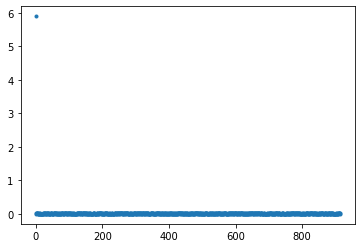

In [140]:
fbar = np.abs(np.fft.fft(f))/len(f)
plt.plot(fbar,'.')

In [141]:
fbar[0] 

5.902699453551913

In [142]:
len(f)/2

457.5

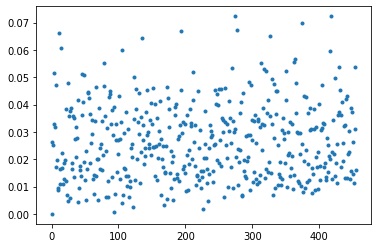

In [143]:
fbar2=np.zeros(456)
# fbar2[0] = fbar[0] 
fbar2[1:456] = 2*fbar[1:456]
plt.plot(fbar2,'.')

In [131]:
fbar2[:10]

array([0.        , 0.02623713, 0.02514991, 0.0329304 , 0.05149158,
       0.03196891, 0.04722996, 0.01731475, 0.01969443, 0.00960423])

---

고유값 차이

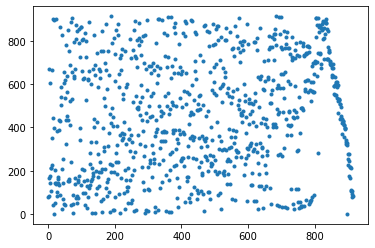

In [123]:
Gap = [np.abs(λ[i] - λ[i-1]) for i in range(len(_df))]
plt.plot(np.argsort(Gap),'.')  

그래프

In [124]:
import networkx as nx

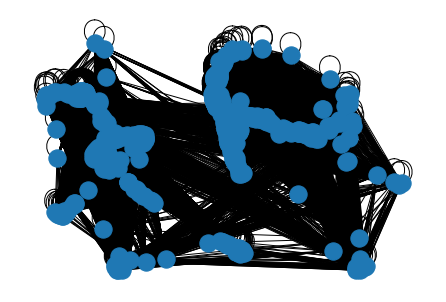

In [125]:
nx.draw(nx.Graph(W))

---

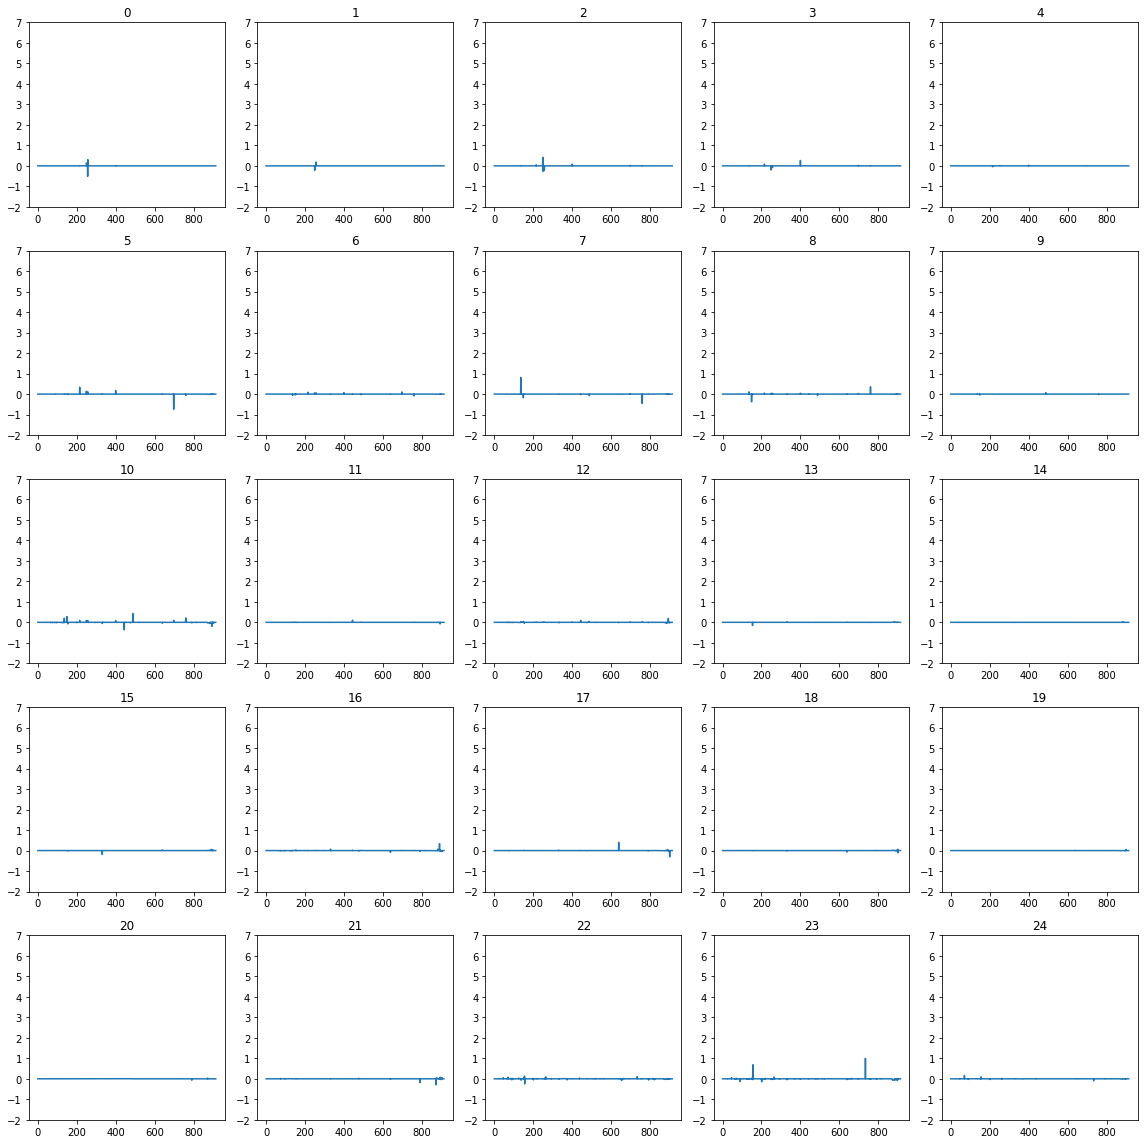

In [126]:
fig,ax =plt.subplots(5,5)
k=0
for i in range(5):
    for j in range(5):
        ax[i][j].plot(f @ np.outer(Ψ[:,k], Ψ[:,k]))
        ax[i][j].set_ylim([-2,7])
        ax[i][j].set_title(k)
        k=k+1
fig.set_figwidth(16)            
fig.set_figheight(16)
fig.tight_layout()        